In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Question

> How can a US insurance company determine the top 10 cities where its clients have the highest annual income for persons aged 40 and below? 

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [20]:
import pandas as pd
# Loading the Data from the source i.e. csv
# Dataset 
url = 'http://bit.ly/MedicalCitiesIncomeDataset' #Using toy_dataset.csv since this link sometimes takes time to load
cities = pd.read_csv('toy_dataset.csv' )
cities

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [4]:
# Previewing the top of our dataset
cities.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [5]:
# Previewing the bottom of our dataset
cities.tail()

,Number,City,Gender,Age,Income,Illness
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No
149999,150000,Austin,Female,37,87251.0,No


In [6]:
# Checking whether each column has an appropriate datatype
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

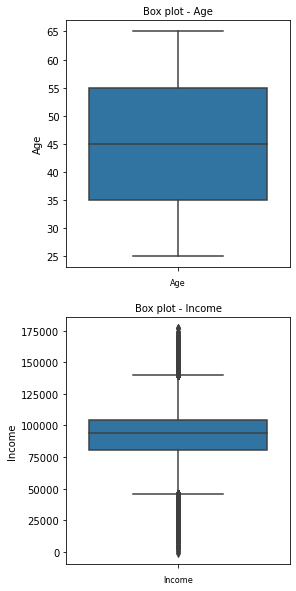

In [7]:
col_names = ['Age', 'Income']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=cities[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [8]:
# Checking for Outliers

#Function to remove outliers using z-score
def remove_outliers(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    return df 

# remove(dataset, 'Income')

clmns = ['Age', 'Income']

for c in clmns:

    new_cities = remove_outliers(cities, c)
    
new_cities
maureen_new = remove_outliers(maureen,'marks')

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [9]:
def percentile_based_outlier(data, col):
    upper_limit = data[col].quantile(0.975)
    lower_limit = data[col].quantile(0.025)
    df_percentile = data[(data[col]< upper_limit) & (data[col]> lower_limit)]
    return df_percentile 
    
clmns = ['Age', 'Income']

for c in clmns:

    cities_remove_outlier_percentage = percentile_based_outlier(cities, c)
    
cities_remove_outlier_percentage



,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


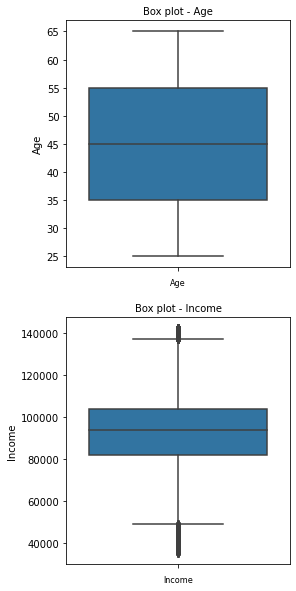

In [10]:
# Checking for Anomalies
col_names = ['Age', 'Income']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=cities_remove_outlier_percentage[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [11]:
# Identifying the Missing Data
#
new_cities.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [12]:
# Dealing with the Missing Data
#

In [13]:
# More data cleaning procedures
#
new_cities.duplicated().any()

False

## 6. Exploratory Analysis

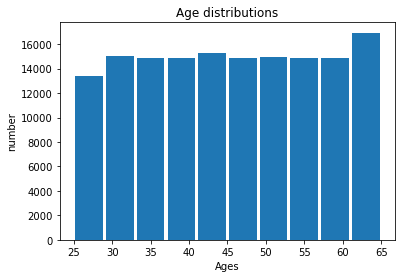

In [14]:
# Ploting the univariate summaries and recording our observations
age = new_cities['Age']

def plot_hist(data, col, bins, xlabel, ylable,title):
    plt.hist(data[col], bins = bins, rwidth=0.9)
    plt.xlabel(xlabel)
    plt.ylabel(ylable)
    plt.title(title)
    plt.show()
    
plot_hist(new_cities, 'Age', 10, 'Ages', 'number','Age distributions')
    
    
# plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
# plt.xlabel('Ages')
# plt.ylabel('Quantity')
# plt.title('Histogram of ages')
# plt.show()

  Illness  Number
0      No  137861
1     Yes   12139


Text(0.5, 1.0, 'City Illiness')

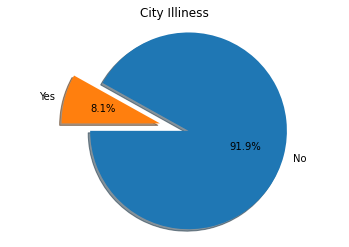

In [15]:
# city_rides.reset_index(inplace=True)
# city_types = city['type']
# city_rides_T= city['ride_id']
# explode = (0, 0.1, 0) 
# #the pir chart goes here
# plt.pie(city_fare_total, explode =explode,  labels = city_type, autopct = '%1.1f%%', shadow = True, startangle = 240)
# plt.axis('equal')
# plt.title('City rides per city type')
# plt.show()


cities_illiness = cities.groupby('Illness').count()['Number'].reset_index()
print(cities_illiness)
illy = cities_illiness['Illness']
numbers = cities_illiness['Number']
explode = (0.1, 0.2) 

plt.pie(numbers, explode = explode, labels = illy, autopct = '%1.1f%%', shadow = True, startangle = 180)
 

# Plotting our pie chart
# plt.pie(cities_illiness  
# autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('City Illiness')
# plt.show()

In [16]:
income = new_cities['Income']

## 7. Implementing the Solution

In [17]:
#How can a US insurance company determine the top 10 cities where its clients have the highest annual income
#for persons aged 40 and below?
new_cities[cities["Age"]<40].groupby('City').mean()['Income'].sort_values(ascending=False).reset_index().head(5)

<ipython-input-17-c52b4a3c825c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_cities[cities["Age"]<40].groupby('City').mean()['Income'].sort_values(ascending=False).reset_index().head(5)


,City,Income
0,Mountain View,134942.417152
1,San Diego,101310.862089
2,New York City,96959.705119
3,Los Angeles,95312.372223
4,Boston,91188.900740


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






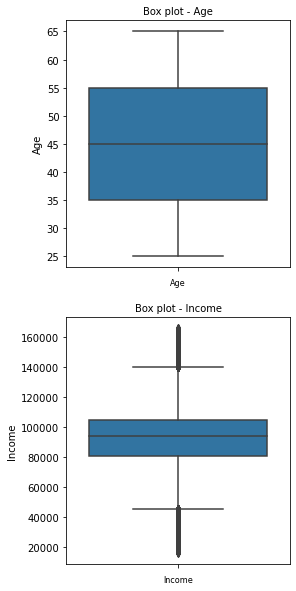

In [18]:
# Reviewing the Solution 

col_names = ['Age', 'Income']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=new_cities[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

# b). Do we need other data to answer our question?

### c). Did we have the right question?